In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pylab as pl
import ot


r = np.random.RandomState(42)


def im2mat(img):
    """Converts an image to matrix (one pixel per line)"""
    return img.reshape((img.shape[0] * img.shape[1], img.shape[2]))


def mat2im(X, shape):
    """Converts back a matrix to an image"""
    return X.reshape(shape)


def minmax(img):
    return np.clip(img, 0, 1)

## Generate data



In [3]:
# Loading images
I1 = pl.imread('data/source.jpg').astype(np.float64) / 256
I2 = pl.imread('data/target2.jpeg').astype(np.float64) / 256


I3 = pl.imread('data/surface1.jpeg').astype(np.float64) / 256
I4=pl.imread('data/target.jpg').astype(np.float64) / 256

I2=I2[60:90,80:110,:]
I1=I1[50:80,70:100,:]


Xs = im2mat(I1)
Xt = im2mat(I2)

X3=im2mat(I3)
X4=im2mat(I4)

nb = 500
idx1 = r.randint(X3.shape[0], size=(nb,))
idx2 = r.randint(X4.shape[0], size=(nb,))

X3 = X3[idx1, :]
X4=X4[idx2,:]


## Plot original image



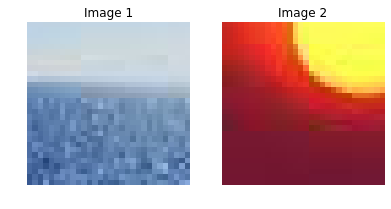

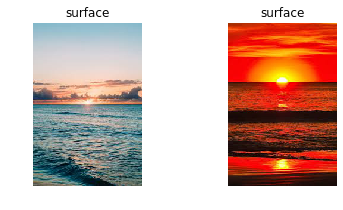

In [4]:
pl.figure(1, figsize=(6.4, 3))

pl.subplot(1, 2, 1)
pl.imshow(I1)
pl.axis('off')
pl.title('Image 1')

pl.subplot(1, 2, 2)
pl.imshow(I2)
pl.axis('off')
pl.title('Image 2')
pl.show()

pl.figure(1, figsize=(6.4, 3))
pl.subplot(1, 2, 1)
pl.imshow(I3)
pl.axis('off')
pl.title('surface')

pl.subplot(1, 2, 2)
pl.imshow(I4)
pl.axis('off')
pl.title('surface')
pl.show()

## Scatter plot of colors



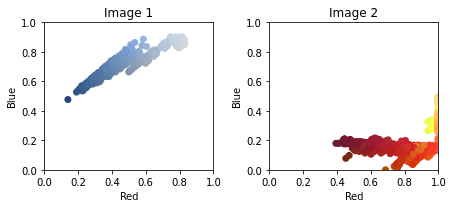

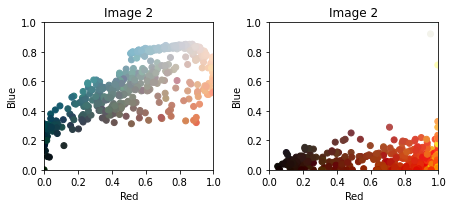

In [5]:
pl.figure(2, figsize=(6.4, 3))

pl.subplot(1, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 2], c=Xs)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 1')

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 2], c=Xt)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 2')
pl.tight_layout()
pl.show()

pl.figure(2, figsize=(6.4, 3))

pl.subplot(1, 2, 1)
pl.scatter(X3[:, 0], X3[:, 2], c=X3)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 2')

pl.subplot(1, 2, 2)
pl.scatter(X4[:, 0], X4[:, 2], c=X4)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 2')

pl.tight_layout()
pl.show()

## Surface of image data given to train fermat


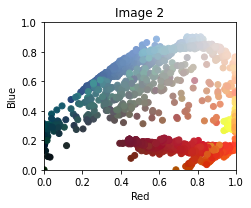

In [6]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
import fermat as F
from scipy.spatial import  distance_matrix

#SOLO INCLUYO UNA DE SURFACE
data=np.concatenate((Xs,Xt,X3),axis=0)

pl.figure(2, figsize=(6.4, 3))

pl.subplot(1, 2, 1)
pl.scatter(data[:, 0], data[:, 2],c=data)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 2')

pl.tight_layout()
pl.show()

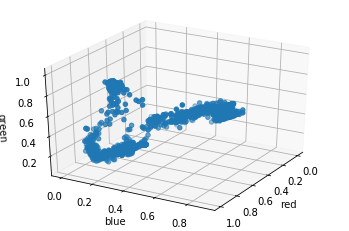

In [7]:
from mpl_toolkits.mplot3d import Axes3D 
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('red')
ax.set_ylabel('blue')
ax.set_zlabel('green')
ax.scatter(data[:, 0], data[:, 2],data[:,1])
ax.view_init(30,30)
pl.show()

## Transport

In [8]:
n=Xs.shape[0]
a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples
print(data.shape[0])

2300


In [9]:
# loss matrix
alpha=2
method='FW'
model=F.Fermat(alpha, path_method=method,k=20)

print(data.shape)
data=data[:,[0,2]]
print(data.shape)
base_dist=np.matrix(distance_matrix(data,data))
model.fit(base_dist)
fermat_distances = model.get_distances()

M = fermat_distances[0:n,n:2*n]
M=np.ascontiguousarray(M)

M=M**2
M /= M.max()

(2300, 3)
(2300, 2)


In [10]:
##REGULAR DISTANCE FOR OPTIMAL TRANSPORT

#M=distance_matrix(data[0:n,:],data[n:2*n,:])
#M /= M.max()

In [11]:
G0 = ot.emd(a, b, M)
transp_Xs_emd=[[Xt[j,:]] for i in range(G0.shape[0]) for j in range(G0.shape[1])  if G0[i,j]!=0]


transp_Xs_emd=np.array(transp_Xs_emd)
print(transp_Xs_emd.shape)

I1t = minmax(mat2im(transp_Xs_emd, I1.shape))


(900, 1, 3)


## Plot new images



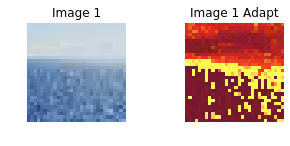

In [12]:
pl.figure(3, figsize=(8, 4))

pl.subplot(2, 3, 1)
pl.imshow(I1)
pl.axis('off')
pl.title('Image 1')

pl.subplot(2, 3, 2)
pl.imshow(I1t)
pl.axis('off')
pl.title('Image 1 Adapt')
pl.show()